![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [5]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<Axes: >

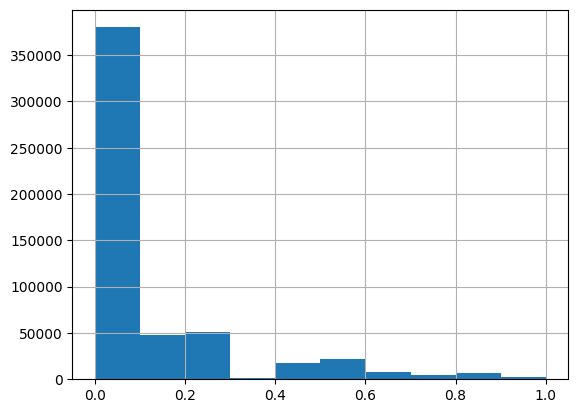

In [6]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [7]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [8]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [9]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [8]:
# Celda 1
vect_1 = CountVectorizer()
X_dtm_train = vect_1.fit_transform(X_train)
X_dtm_test = vect_1.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_dtm_train, y_train)
y_pred = rf.predict(X_dtm_test)
mse = mean_squared_error(y_test, y_pred)

print("MSE:", mse)

MSE: 0.030588852665764596


1. Se importa la biblioteca de sklearn y los módulos CountVectorizer, RandomForestRegressor y mean_squared_error.
2. Se instancia el objeto CountVectorizer llamado vect_1.
3. Se aplica el método fit_transform del objeto vect_1 al conjunto de entrenamiento X_train y se guarda el resultado en la variable X_dtm_train. El método fit_transform realiza una doble operación: ajusta el modelo al conjunto de entrenamiento y luego lo transforma en una matriz de términos de documento (DTM).
4. Se aplica el método transform del objeto vect_1 al conjunto de prueba X_test y se guarda el resultado en la variable X_dtm_test. El método transform transforma el conjunto de prueba en una matriz DTM utilizando el vocabulario aprendido del conjunto de entrenamiento.
5. Se instancia un modelo de bosque aleatorio (RandomForestRegressor) llamado rf con los siguientes hiperparámetros:

    * n_estimators=100: número de árboles que se van a utilizar en el modelo.
    * max_depth=10: profundidad máxima de cada árbol.
    * random_state=42: semilla aleatoria para reproducir los mismos resultados en cada ejecución.
    
6. Se entrena el modelo rf en el conjunto de entrenamiento (X_dtm_train e y_train) utilizando el método fit.
7. Se usan los datos de prueba (X_dtm_test) para hacer predicciones utilizando el método predict, y se guarda el resultado en la variable y_pred.
8. Se calcula el error cuadrático medio (MSE) entre las predicciones del modelo (y_pred) y los valores reales (y_test) utilizando el método mean_squared_error.
9. Se imprime el valor de MSE.

Dado que la variable objetivo tiene una escala de 0 a 1 y en promedio es 0.1, podemos decir que el MSE obtenido de 0.030 es relativamente bajo y sugiere que el modelo tiene una buena capacidad predictiva. En general, el valor de MSE se interpreta en función de la escala de la variable objetivo. En este caso, como la variable objetivo está en una escala de 0 a 1, podemos decir que el valor de MSE indica que el modelo tiene una precisión media en las predicciones.

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [8]:
# Celda 2
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

vect_2 = CountVectorizer(lowercase=False, ngram_range=(1, 3), stop_words='english')
X_trigrama_train = vect_2.fit_transform(X_train)
X_trigrama_test = vect_2.transform(X_test)

rf = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42, n_jobs=-1)
rf.fit(X_trigrama_train, y_train)
y_pred = rf.predict(X_trigrama_test)
mse = mean_squared_error(y_test, y_pred)

# Imprimir el valor del MSE
print("MSE:", mse)

1. En la primera línea de código se instancia un objeto de la clase CountVectorizer que se utilizará para preprocesar el texto de los comentarios. En este caso la opción ngram_range=(1, 3) establece los trigramas requeridos.

2. Luego, se utiliza el método fit_transform del objeto CountVectorizer para transformar los datos de entrenamiento X_train en una matriz dispersa X_trigrama_train que representa la frecuencia de los trigramas (secuencias de tres palabras consecutivas) en cada comentario. 

3. A continuación, se utiliza el método transform del objeto CountVectorizer para transformar los datos de prueba X_test en una matriz dispersa X_trigrama_test utilizando el mismo vocabulario aprendido en los datos de entrenamiento.

4. Se importa la clase RandomForestRegressor del módulo ensemble de la biblioteca Scikit-Learn.

5. Luego, se instancia un objeto de la clase RandomForestRegressor con los siguientes parámetros:
    * n_estimators=100: número de árboles que se van a utilizar en el modelo.
    * max_depth=10: profundidad máxima de cada árbol.
    * random_state=42: semilla aleatoria para reproducir los mismos resultados en cada ejecución.

6. A continuación, se utiliza el método fit del objeto RandomForestRegressor para ajustar el modelo a los datos de entrenamiento X_trigrama_train y y_train.

7. Luego, se utiliza el método predict del objeto RandomForestRegressor para predecir las etiquetas de toxicidad para los datos de prueba X_trigrama_test.

8. Se utiliza la función mean_squared_error del módulo metrics de Scikit-Learn para calcular el error cuadrático medio (MSE) entre las etiquetas verdaderas de toxicidad y las etiquetas predichas por el modelo.

9. Finalmente, se imprime el valor del MSE.

El valor de el MSE fue levemente superior al obtenido en el caso inicial, por lo que no se mejoró el resultado del primer modelo.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

La técnica de tokenización TfidfVectorizer es una herramienta que se utiliza en la minería de textos y el procesamiento del lenguaje natural. Esta técnica es una variante de la técnica CountVectorizer que asigna valores numéricos a las palabras de un documento, lo que permite una representación vectorial del mismo.

La técnica TfidfVectorizer se basa en la frecuencia de términos inversa de documentos (TF-IDF, por sus siglas en inglés). La frecuencia de términos (TF) mide la frecuencia de una palabra en un documento específico. Por otro lado, la frecuencia inversa de documentos (IDF) mide la importancia de una palabra en relación con el conjunto de documentos.

El TfidfVectorizer utiliza estas dos medidas para determinar la importancia de cada palabra en un documento. Por lo tanto, las palabras que aparecen con frecuencia en un documento, pero raramente en otros documentos, tendrán un valor de TF-IDF alto, lo que indica que son importantes para el documento en cuestión.

Las ventajas del uso de TfidfVectorizer en comparación con CountVectorizer son:

Mejora la precisión en la identificación de palabras importantes en un documento, ya que considera tanto la frecuencia de la palabra en el documento como la frecuencia inversa de documentos en todo el conjunto de documentos.

Ayuda a eliminar palabras comunes que no aportan información relevante al documento, como artículos y preposiciones, lo que conduce a una mejor calidad de las características utilizadas para el análisis.

Permite comparar documentos de diferente longitud, ya que tiene en cuenta la frecuencia de aparición de cada palabra en relación con el conjunto de documentos.

Por otro lado, las desventajas de TfidfVectorizer son:

Puede ser más lento que CountVectorizer en la tokenización y vectorización de grandes conjuntos de documentos debido a que requiere un mayor procesamiento.

En algunos casos, puede tener dificultades para manejar documentos con términos muy específicos y únicos, ya que el IDF de estas palabras puede ser muy alto, lo que puede reducir la importancia de otras palabras en el documento.

En resumen, TfidfVectorizer es una técnica de tokenización que utiliza la frecuencia de términos inversa de documentos para asignar valores numéricos a las palabras en un documento. Esta técnica puede mejorar la precisión en la identificación de palabras importantes en un documento y puede eliminar palabras comunes, lo que conduce a una mejor calidad de las características utilizadas para el análisis. Sin embargo, también puede ser más lento y puede tener dificultades para manejar documentos con términos muy específicos y únicos.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Celda 4
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer

# Procesar los datos de texto con TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_dtm_train = vectorizer.fit_transform(X_train)
X_dtm_test = vectorizer.transform(X_test)

# Entrenar el modelo de regresión aleatoria forestal
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

rf.fit(X_dtm_train, y_train)

# Predecir las probabilidades de toxicidad en el conjunto de prueba
y_pred = rf.predict(X_dtm_test)

# Calcular el error cuadrático medio (MSE)
msetfid = mean_squared_error(y_test, y_pred)
print("MSE:", msetfid)

MSE: 0.030556492277728196


En este código, primero cargamos el conjunto de datos y seleccionamos las columnas 'id', 'comment_text' y 'target'. Luego dividimos los datos en conjuntos de entrenamiento y prueba.

Luego procesamos los datos de texto utilizando TfidfVectorizer, que convierte los documentos de texto en vectores numéricos que pueden ser utilizados como entrada para un modelo de aprendizaje automático.

A continuación, entrenamos un modelo de RandomForest en los datos de entrenamiento, y utilizamos el modelo para predecir las probabilidades de toxicidad en el conjunto de prueba.

Finalmente, calculamos el error cuadrático medio (MSE) para evaluar el rendimiento del modelo, el cual termino siendo 0.030556492277728196.

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

In [ ]:
# Celda 5

